Thank you for applying to the ML Engineer role at SucceedSmart. We were impressed by your profile and accomplishments. As the next step, we would like to setup a few conversations with the team. To move forward in the process, we would like for you to complete a short coding example using Python and Jupyter. (It should take no more than 1-2 hours.)
1. Scrape a public website like indeed or Monster.com for a small set of job postings : https://www.indeed.com/q-Vice-President-Finance-l-United-States-jobs.html 
2. Save the text to a suitable file format
3. Analyze the data (parse, tokenize, vectorize etc) to extract the most relevant skills into a library - ranked and scored by any algorithm you prefer. 
4. Compute metrics on the relevance of the skills and any other quality measures you think will indicate the quality of the skills library. 
5. How would you measure the improvement of the library over time?
6. If given more data and time, what areas would you explore further to improve the skills library?

# 1. Parsing the data
I am a lazy boy byt nature and I am not going to reinvent the wheel for this assignment, however I would like to show you that I can uase all the tools in my toolbox. Therefore, I performed the parsing of indeed VP of Finance listings using ParseHub,
As it is not an ideal way to do the job, I ran the algorithm a few times, collected several CSVs and selected the postings with job description filled out

## Notes:
Indeed has a peculiar way of organizing the HTML descriptions, I did my best to parse the descriptions for the jobs, algorithm can be improved if parsing includes other anchors for the same outcome of description

# 2. Saving the data
I am most comfortable with working with CSV formats, so let's look at the data I have parsed

In [96]:
from datetime import datetime
datetime_1 = datetime.now()
print(str(datetime_1))
datetime_now = '2021-05-10 23:28:36.155825'

2021-05-11 12:59:43.499227


In [97]:
import glob
import pandas as pd
df = pd.concat(map(pd.read_csv, glob.glob('/content/data/*.csv')))

In [98]:
print(df.info(), "-"*100,"\n", df.describe(),"-"*100,"\n")
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 36
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   listing_name         157 non-null    object
 1   listing_location     157 non-null    object
 2   listing_description  78 non-null     object
 3   listing_salary       29 non-null     object
dtypes: object(4)
memory usage: 6.1+ KB
None ---------------------------------------------------------------------------------------------------- 
                    listing_name  ...              listing_salary
count                       157  ...                          29
unique                       52  ...                          17
top     Vice President, Finance  ...  $150,000 - $200,000 a year
freq                         24  ...                           4

[4 rows x 4 columns] ---------------------------------------------------------------------------------------------------- 



,listing_name,listing_location,listing_description,listing_salary
9,"Vice President, Finance","Washington, DC 20036 (Downtown area)",Company Description\nRockCreek is a leading gl...,NaN
9,"Vice President, Corporate Finance","Malvern, PA 19355","Location: Malvern, PA, US, 19355\nDescription:...",NaN
32,"Vice President, Finance","Washington, DC 20036 (Downtown area)",NaN,NaN
5,VICE PRESIDENT FINANCE,"Dallas, TX 75237 (Wolf Creek area)",Your Job:\nThe VICE PRESIDENT - FINANCE of MET...,NaN
2,"OTA Allocations - Financial Analyst, Assistant...","Tempe, AZ",Do you want your voice heard and your actions ...,NaN
23,VP of Finance,Connecticut,NaN,"$170,000 a year"
16,Vice President - Investment Banking - Consumer,"Charlotte, NC 28209 (Barclay Downs area)",NaN,NaN
24,"Vice President, FP&A",Remote,NaN,NaN
5,VP of Finance,"Mount Pleasant, MI 48858","Lodgco Hospitality is a multi-brand, hospitali...",NaN
4,"Vice President, Finance","Somerset, NJ 08873",Overview:\nDemant is a leading international h...,NaN


In [99]:
# Let's get rid of the rows where the parser couldn't get any job description
df = df[~df['listing_description'].isnull()]
df = df.drop_duplicates(subset='listing_description') # get rid of duplicated listings
df['listing_salary'] = df['listing_salary'].fillna(0) # mark no-salary jobs as 0s

In [100]:
df

,listing_name,listing_location,listing_description,listing_salary
0,"Vice President, Finance","Philadelphia, PA 19146 (Point Breeze area)","Vice President, Finance\nExyn Technologies is ...",0
1,"Vice President, Finance","San Francisco, CA",Job Requisition ID #\n21WD47719\nPosition Over...,0
2,"Vice President, Finance","Washington, DC 20036 (Downtown area)",Company Description\nRockCreek is a leading gl...,0
3,"Vice President, Finance (IGA)","Santa Monica, CA 90404 (Mid-City area)","We are UMG, the Universal Music Group. We are ...",0
4,"Vice President, Financial Planning & Analysis Job","Westborough, MA 01582",BJ's Wholesale Club was the first retailer to ...,0
5,VICE PRESIDENT FINANCE,"Dallas, TX 75237 (Wolf Creek area)",Your Job:\nThe VICE PRESIDENT - FINANCE of MET...,0
6,"Vice President, Finance","Hemet, CA 92545",Wondering what’s within Danaher? Take a closer...,0
7,Vice President of Finance,"President, PA",LENA is a game changer in early childhood. Res...,"$125,000 a year"
8,Vice President of Finance & Planning,"Bend, OR 97701 (Larkspur area)",Phenomenal opportunity with an industry leader...,0
9,"Vice President, Corporate Finance","Malvern, PA 19355","Location: Malvern, PA, US, 19355\nDescription:...",0


# 3. Cleaning and EDA

In [101]:
import re
import string
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords, words

nltk.download('words')
words = set(nltk.corpus.words.words())

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    letters = re.findall('[a-zA-Z\s]', text)# rid on non-Latin characters
    text = ''.join(letters)
    text = re.sub('\[.*?\]', '', text) # brackets
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #punctuation
    text = re.sub('\w*\d\w*', '', text) # numbers
    '''Get rid of some additional punctuation and non-sensical text.'''
    text = re.sub('[‘’“”…]', '', text) # upper punctuation
    text = re.sub('\n', '', text) # any \n
    return text

clean = lambda x: clean_text(x)
# Let's take a look at the updated text
df.listing_description = df.listing_description.apply(clean)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [102]:
df

,listing_name,listing_location,listing_description,listing_salary
0,"Vice President, Finance","Philadelphia, PA 19146 (Point Breeze area)",vice president financeexyn technologies is pio...,0
1,"Vice President, Finance","San Francisco, CA",job requisition id wdposition overviewreportin...,0
2,"Vice President, Finance","Washington, DC 20036 (Downtown area)",company descriptionrockcreek is a leading glob...,0
3,"Vice President, Finance (IGA)","Santa Monica, CA 90404 (Mid-City area)",we are umg the universal music group we are th...,0
4,"Vice President, Financial Planning & Analysis Job","Westborough, MA 01582",bjs wholesale club was the first retailer to i...,0
5,VICE PRESIDENT FINANCE,"Dallas, TX 75237 (Wolf Creek area)",your jobthe vice president finance of methodi...,0
6,"Vice President, Finance","Hemet, CA 92545",wondering whats within danaher take a closer l...,0
7,Vice President of Finance,"President, PA",lena is a game changer in early childhood rese...,"$125,000 a year"
8,Vice President of Finance & Planning,"Bend, OR 97701 (Larkspur area)",phenomenal opportunity with an industry leader...,0
9,"Vice President, Corporate Finance","Malvern, PA 19355",location malvern pa us descriptionvice preside...,0


## My approach of selecting the skills is to find the most common words in descriptions, get rid of stop words and find a list that can resemble a list of skills

In [107]:
# 1. combine descriptions into a bag of words
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ''.join(list_of_text)
    return combined_text

text = df.listing_description.apply(combine_text)

In [110]:
combined_text = ' '.join(text)

In [114]:
combined_text

'vice president financeexyn technologies is pioneering autonomous aerial robot systems for complex gpsdenied environments the companys fullstack solution enables flexible deployment of single or multirobots that can intelligently navigate and dynamically adapt to complex environments in realtimein laymans terms were paving the way and this groundbreaking work requires a talented passionate team as such we are currently on the market for a vice president financewe imagine that you find yourself reading this job description because the job title the robots or other sparked your interest whatever the reason were glad that youre here and if you are compelled by an opportunity to make an impact and build something from the ground up we encourage you to read onthe roleas our first inhouse finance lead you will develop the strategic financial vision needed to support exyns growth you will serve as a business partner assuming a role in the overall management of the company by planning implemen

In [123]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords, words

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
words = set(nltk.corpus.words.words())
def tok_lem(text):
  tokenizer = RegexpTokenizer(r'\w+')
  tokens = tokenizer.tokenize(text)  
  filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
  stem_words=[stemmer.stem(w) for w in filtered_words]
  lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
  return " ".join(w for w in lemma_words if w.lower() in words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [125]:
data_clean = tok_lem(combined_text)

In [155]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
stop_words = stopwords.words('english')
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform([data_clean])
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm = data_dtm.T
data_dtm.reset_index(inplace=True)
data_dtm = data_dtm.rename(columns = {0:'count', 'index':'word'})
data_dtm

,word,count
0,abreast,1
1,abstract,1
2,accept,12
3,access,3
4,acclaim,1
...,...,...
915,would,1
916,write,3
917,written,12
918,year,59


In [166]:
sorted_words = data_dtm.sort_values(by='count',ascending=False)

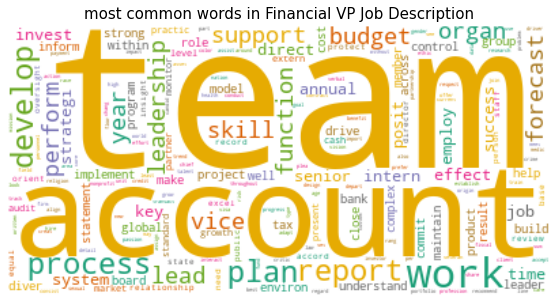

In [198]:
# Let's makea word cloud to visualize the results!
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = [20, 5]

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)
wc.generate(' '.join(sorted_words.word))

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('most common words in Financial VP Job Description', fontsize = 15)
plt.show()

In [ ]:
# Here I will create a skillset for a VP of Finance
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

ps = PorterStemmer()

skills = list([word for word in sorted_words.head(40).word])


# process the job description.
def prepare_job_desc(desc):
    # tokenize description.
    tokens = word_tokenize(str(desc))
        
    # Parts of speech (POS) tag tokens.
    token_tag = pos_tag(tokens)
    
    # Only include some of the POS tags.
    include_tags = ['VBN', 'VBD', 'JJ', 'JJS', 'JJR', 'CD', 'NN', 'NNS', 'NNP', 'NNPS']
    filtered_tokens = [tok for tok, tag in token_tag if tag in include_tags]
    
    # stem words.
    stemmed_tokens = [ps.stem(tok).lower() for tok in filtered_tokens]
    return set(stemmed_tokens)

df['listing_description'] = df['listing_description'].map(prepare_job_desc)

# process the keywords
skills_set = set([ps.stem(tok) for tok in skills]) # stem the keywords (since the job description is also stemmed.)

skills_set

# 4. Compute metrics

As I only have one position, I can only value the relevance of the skills by how often they appear in the job posings.
So, ***the metric is the frequency***

# 5. measuring Improvement of the library
I want to constantly update the library with parsed csv files to increase the relative frequency of the skills

# 6. What is left to do?
* Get more data to improve the quality of the algorithm
* find similar job positions and find which skills are more related to VP of finance in contrast to other similar jobs
* add more job postings to the data to find the skills that are not related to the position
* add sentiment and polarization to find out which skills are recruiter-opinion based, and which skills are the core-factual
* classify skills by categories(i.e. soft/hard/people/progr)